# Practicum 1
### Investigating flight patterns and delays to determine which airline and airport is the most reliable for flying out of California, Nevada, and Arizona
Group: Alexander Sakkas, Jasmine McCoy, Lauren Foster

Date: 5/20/24


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import timedelta
from datetime import time

Reading and inspecting the data

In [2]:
# turn csv file into a data frame
df = pd.read_csv("2019_ONTIME_REPORTING_FSW.csv")
df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [3]:
# the data has 1,897,503 rows and 14 columns
df.shape

(1897503, 14)

In [4]:
# count the number of null values for each column
df.isnull().sum()

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

In [5]:
# display data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [6]:
# count the number of null values in each row
df.isnull().sum(axis = 1).sort_values(ascending = False)

1897496    6
1897484    6
1897423    6
1897374    6
1897307    6
          ..
58         0
59         0
60         0
61         0
1897478    0
Length: 1897503, dtype: int64

In [7]:
df.describe(include = "all")

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
count,1897503,1897503,1892712,1.897503e+06,1897503,1897503,1897503,1897503,1.870796e+06,1.870788e+06,1.869259e+06,1.865619e+06,1.865619e+06,1.897503e+06
unique,365,15,4888,NaN,152,43,152,43,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-08-09,WN,N706SK,NaN,LAX,CA,LAX,CA,NaN,NaN,NaN,NaN,NaN,NaN
freq,5730,556915,1754,NaN,219952,814858,219996,814867,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.049927e+03,NaN,NaN,NaN,NaN,1.341393e+03,1.316313e+01,1.470180e+03,1.272357e+01,1.748096e+02,1.144598e+03
std,NaN,NaN,NaN,1.679758e+03,NaN,NaN,NaN,NaN,5.190586e+02,4.367718e+01,5.594787e+02,4.306495e+01,9.273539e+01,7.560259e+02
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.600000e+01,6.600000e+01
25%,NaN,NaN,NaN,7.060000e+02,NaN,NaN,NaN,NaN,9.130000e+02,0.000000e+00,1.050000e+03,0.000000e+00,9.400000e+01,4.470000e+02
50%,NaN,NaN,NaN,1.636000e+03,NaN,NaN,NaN,NaN,1.326000e+03,0.000000e+00,1.518000e+03,0.000000e+00,1.530000e+02,9.540000e+02
75%,NaN,NaN,NaN,2.718000e+03,NaN,NaN,NaN,NaN,1.757000e+03,8.000000e+00,1.936000e+03,7.000000e+00,2.440000e+02,1.744000e+03


Addressing missing values with imputation and deletion. 

No rows have more than half of the columns missing. We will perform imputation and replace missing values in the columns DEP_DELAY, ARR_DELAY, and ELAPSED_TIME with the mean value of that column. We have chosen to delete the rows with remaining null values (in columns TAIL_NUM, DEP_TIME, and ARR_TIME) because replacing the missing values with the means or mode would not make sense and could lead to innacurate conclusions due to the nature of those columns. We are deleting less than 2% of the data so we do not believe this will affect our results.

In [8]:
# replace null delay and elapsed time values with the average of that column
col_repl = ["DEP_DELAY", "ARR_DELAY", "ELAPSED_TIME"]
df[col_repl] = df[col_repl].fillna(df[col_repl].mean())

In [9]:
# delete rows with missing values in the remaining columns 
df = df.dropna(subset = ["TAIL_NUM", "DEP_TIME", "ARR_TIME"])

Type casting to suitable data types

In [10]:
# list of columns to convert to int
col_convert = ["DEP_TIME", "DEP_DELAY", "ARR_TIME", "ARR_DELAY", "ELAPSED_TIME"]

# convert columns to int
df[col_convert] = df[col_convert].astype(int)

# convert date column to date type
df["FL_DATE"] = df['FL_DATE'].astype('datetime64[ns]')

# add a column to show what month the flight occured
df["MONTH_DEPARTED"] = df["FL_DATE"].dt.month

Checking for invalid data

df.describe showed us that  all times are within a 24 hour period. The minimum and maximum values for FL_NUM, DEP_DELAY, and ARR_DELAY seem reasonable. We plan to investigate the row with the minimum ELAPSED_TIME to ensure it corresponds with the minimum DISTANCE. We also want to check that all flights are to or from CA, NV, or AZ. 

In [11]:
# ensure all flights are to or from CA, NV, or AZ
valid_states = ["CA", "NV", "AZ"]
valid_rows = df[df["ORIGIN_ST"].isin(valid_states) | df["DEST_ST"].isin(valid_states)]
invalid_rows = df[~df.index.isin(valid_rows.index)]
invalid_rows.size

0

In [12]:
# inspecting the flight with an elapsed time of 26 minutes
df[df["ELAPSED_TIME"] == 26]

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE,MONTH_DEPARTED
413739,2019-12-20,OO,N472CA,5709,SFO,CA,STS,CA,2134,0,2200,0,26,66,12
1151545,2019-06-11,OO,N964SW,5316,MRY,CA,SFO,CA,708,8,734,0,26,77,6


The output of our code tells us that all data entries are of flights going to or from CA, NV, or AZ. The rows with a small elapsed time make sense because they are traveling a short distance within one state. We have not found any invalid data.

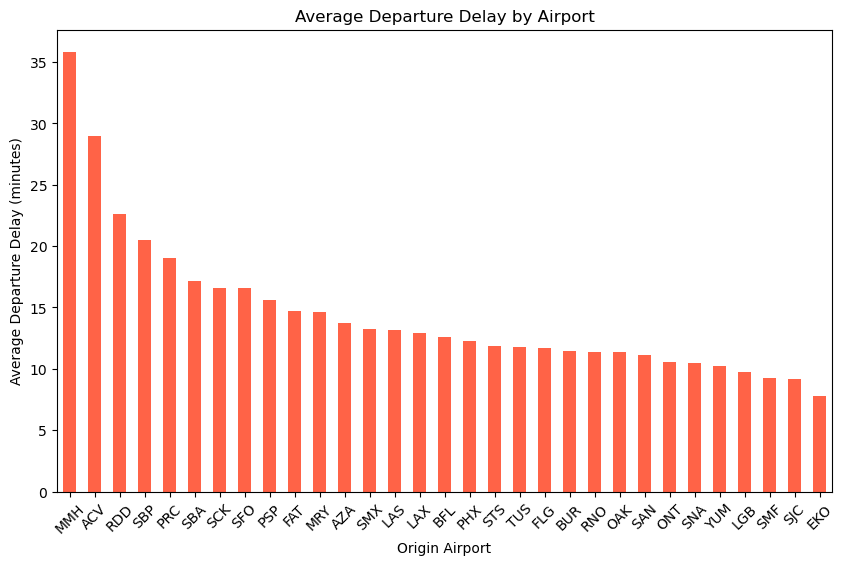

In [13]:
# visualizing which airports in CA, NV, and AZ have the most departure delays
df_outbound = df[(df["ORIGIN_ST"] == "CA") | (df["ORIGIN_ST"] == "NV") | (df["ORIGIN_ST"] == "AZ")]

# Group by airport and calculate the mean of 'DEP_DELAY'
airport_delay = df_outbound.groupby("ORIGIN")["DEP_DELAY"].mean().sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
airport_delay.plot(kind ="bar", color="tomato")
plt.title("Average Departure Delay by Airport")
plt.xlabel("Origin Airport")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

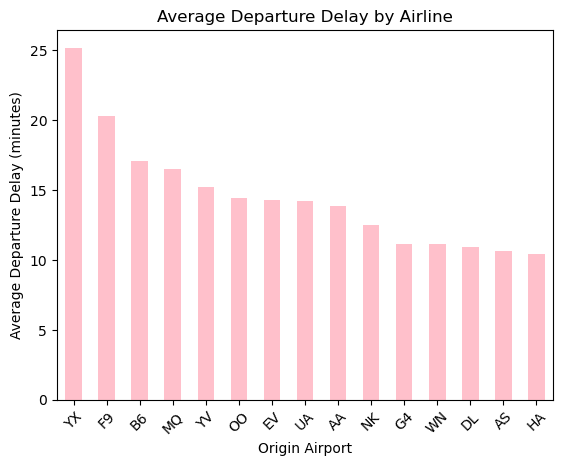

In [14]:
# visualizing which airlines have the most departure delays when leaving from in CA, NV, and AZ

# Group by airport and calculate the mean of 'DEP_DELAY'
airline_delay = df_outbound.groupby("CARRIER_CODE")["DEP_DELAY"].mean().sort_values(ascending=False)

# Plot the bar graph
airline_delay.plot(kind="bar", color="pink")
plt.title("Average Departure Delay by Airline")
plt.xlabel("Origin Airport")
plt.ylabel("Average Departure Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

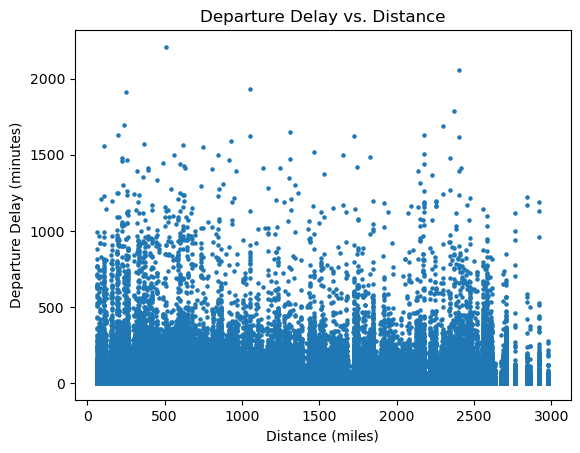

In [15]:
# visualizing the correlation between distance of flight and departure delay times for flights coming to or from CA, NV, and AZ
plt.scatter(df_outbound["DISTANCE"], df_outbound["DEP_DELAY"], s=5)
plt.title("Departure Delay vs. Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Departure Delay (minutes)")
plt.show()

These visualizations teach us the following:

Mammoth Yosemite Airport and California Redwood County Airport have the highest delay times on average while Elko Regional Airport has the lowest average delay time for the flights in our dataset departing from CA, NV, or AZ. 

Republic Airways followed by Frontier Airlines have the highest delay times on average while Alaska Airlines and Hawaiian Airlines both appear to have the lowest average delay time for the flights in our dataset departing from CA, NV, or AZ. 

There appears to be no correlation between distance and departure delay times for flights going to or from CA, NV, or AZ in our dataset. 

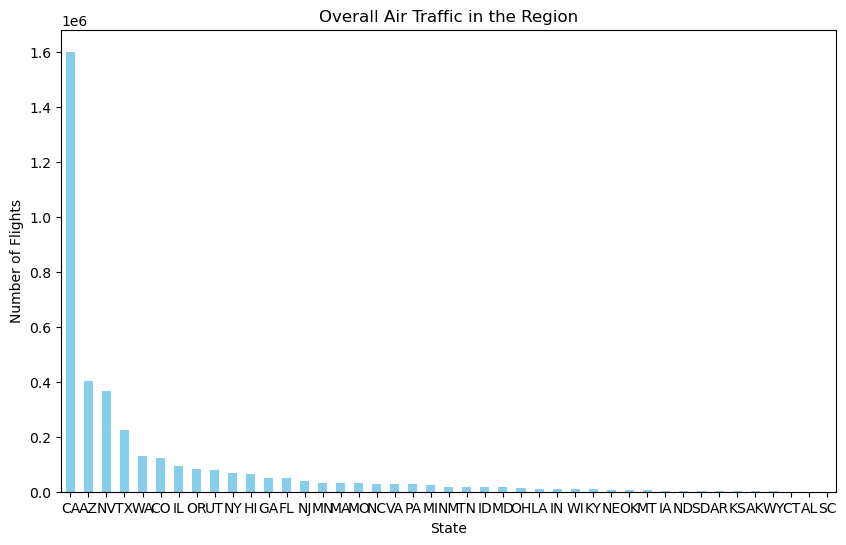

In [16]:
# Filter data for the region
region_states = ['AZ', 'NV', 'CA']
region_df = df[df['ORIGIN_ST'].isin(region_states) | df['DEST_ST'].isin(region_states)]

# Analyze overall air traffic for each state
state_traffic = region_df.groupby('ORIGIN_ST').size().add(region_df.groupby('DEST_ST').size(), fill_value=0)
state_traffic = state_traffic.astype(int).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
state_traffic.plot(kind='bar', color='skyblue')
plt.title('Overall Air Traffic in the Region')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()

Disclaimer: there are more airports than CA, AZ, and NV because this analysis also took into account where the flights out of those 3 states were arriving to

- The region with the most air traffic is California

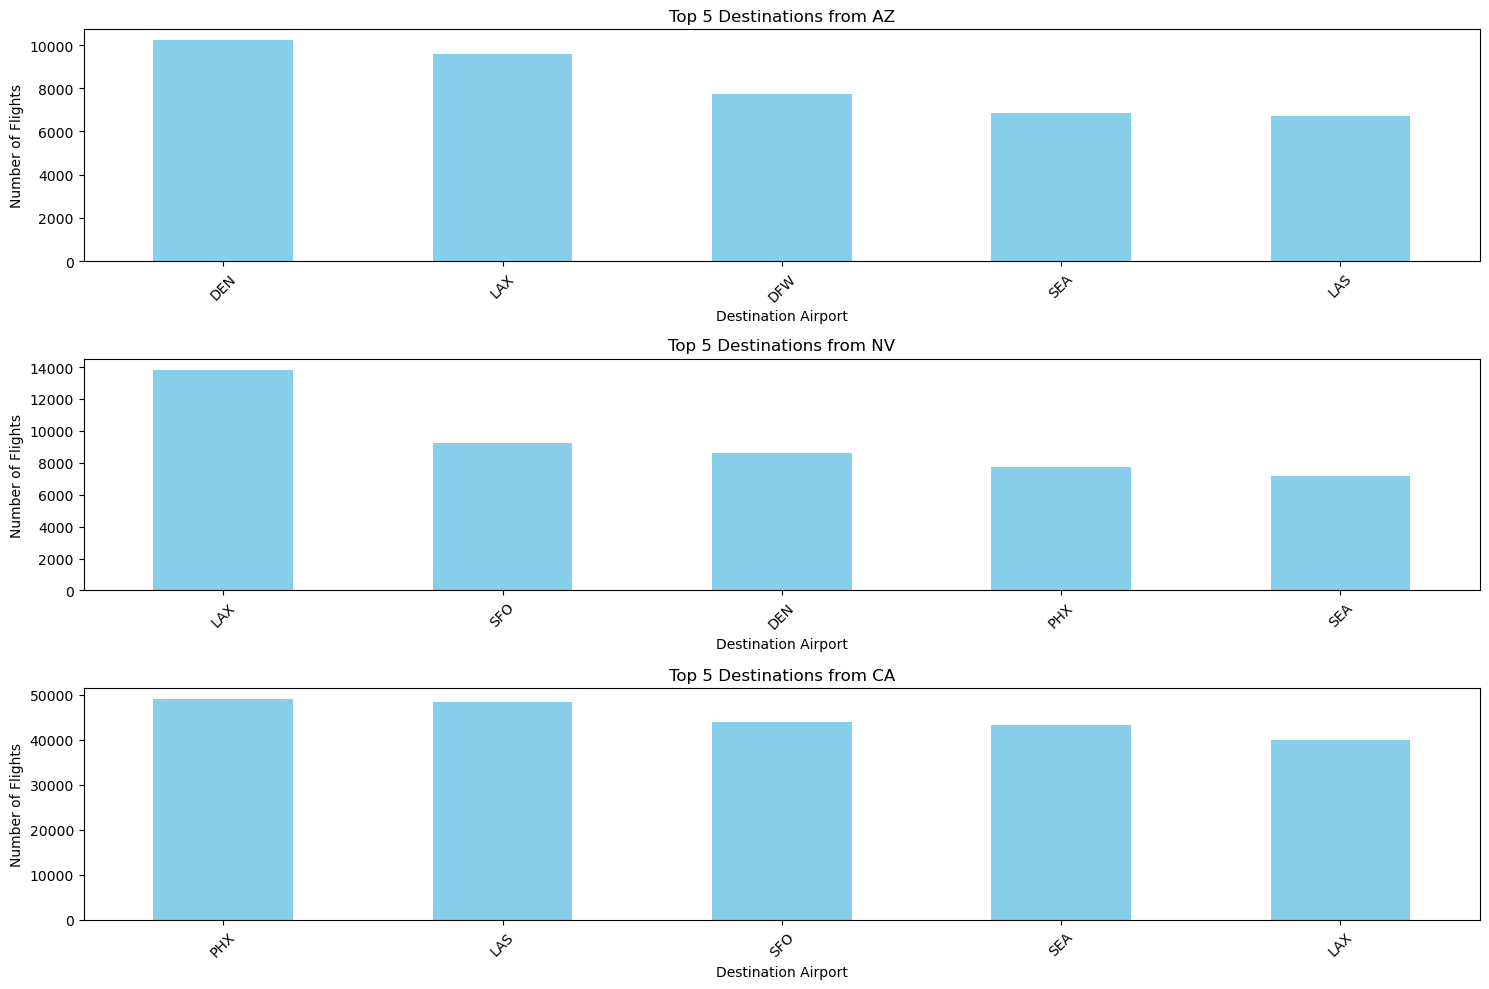

In [17]:
# Analyze popular outbound/destination airports for each state
top_destinations = {}
for state in region_states:
    outbound_flights = region_df[region_df['ORIGIN_ST'] == state]
    destination_counts = outbound_flights['DEST'].value_counts().head(5)
    top_destinations[state] = destination_counts

# Plotting
plt.figure(figsize=(15, 10))
for i, (state, destinations) in enumerate(top_destinations.items(), start=1):
    plt.subplot(3, 1, i)
    destinations.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Destinations from {state}')
    plt.xlabel('Destination Airport')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most popular destination airport for people flying out of Arizona is Denver International, from Nevada is Los Angeles International, and from California is Phoenix Sky Harbor International

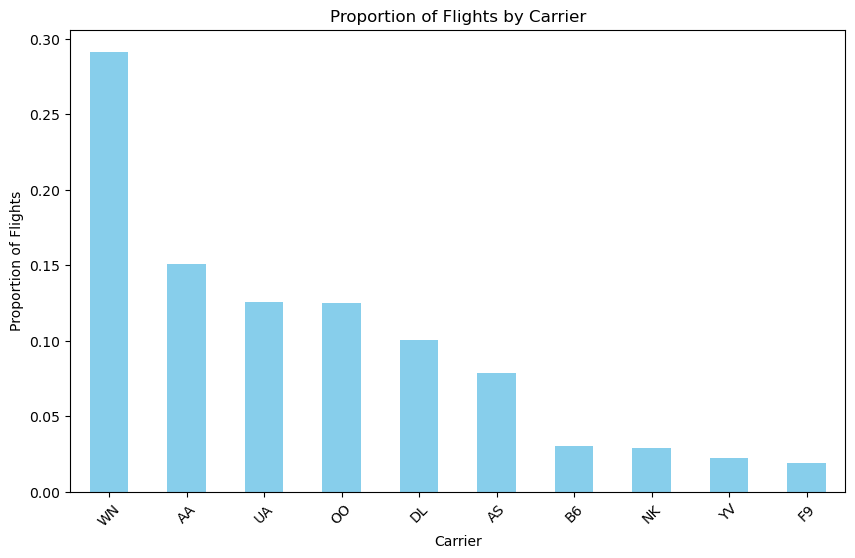

In [35]:
# Calculate the proportion of flights for each carrier
carrier_proportions = df['CARRIER_CODE'].value_counts(normalize=True).head(10)

# Plotting
plt.figure(figsize=(10, 6))
carrier_proportions.plot(kind='bar', color='skyblue')
plt.title('Proportion of Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=45)
plt.show()

Of the flights in the region, Southwest Airlines handles the majority, with American and United Airlines being 2nd and 3rd, respectively. Frontier Airlines handles the least amount of flights.

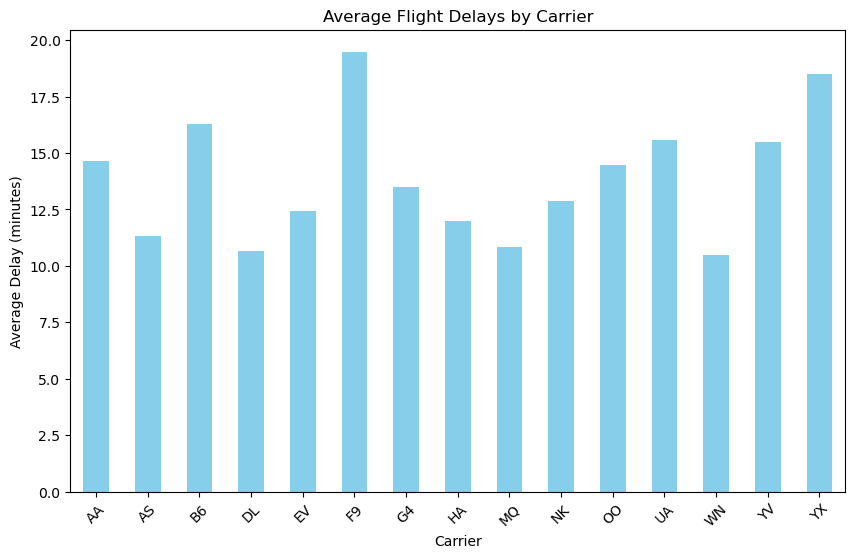

In [40]:
# Analyze flight delays for each airline/carrier
dep_delays = df.groupby('CARRIER_CODE')['DEP_DELAY'].mean()
arr_delays = df.groupby('CARRIER_CODE')['ARR_DELAY'].mean()
overall_delays = (dep_delays + arr_delays) / 2

# Plotting
plt.figure(figsize=(10, 6))
overall_delays.plot(kind='bar', color=['skyblue', 'skyblue'])
plt.title('Average Flight Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

The carriers with the most flight delays are Frontier, Republic Airlines, and JetBlue.

Text(0, 0.5, 'Minutes delayed')

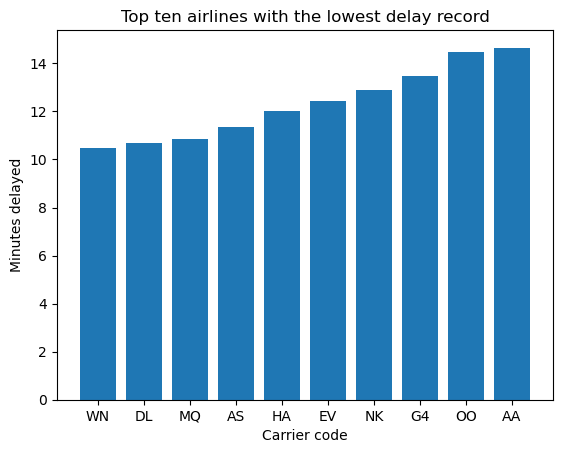

In [19]:
# get a list of all the carriers
carrier_lst = df["CARRIER_CODE"].unique().tolist()

# create the dictionary to use later
carrier_dct = {}

# go through the carriers to find their average delay, adding the time to a list with the key as the carrier
# and the value as the delay time
for carrier in carrier_lst:
    carrier_df = df[df["CARRIER_CODE"] == carrier]
    avg_dep_delay = carrier_df["DEP_DELAY"].describe()["mean"]
    avg_arr_delay = carrier_df["ARR_DELAY"].describe()["mean"]
    avg_delay = round((avg_dep_delay + avg_arr_delay) / 2, 2)
    carrier_dct[carrier] = avg_delay

# sort the names and the delay times to be able to use the top ten later
carrier_names = sorted(carrier_dct.keys(), key=lambda k: carrier_dct[k], reverse= False)
carrier_delays = sorted(carrier_dct.values(), reverse = False)

# plot the top ten lowest delays for carriers
plt.bar(carrier_names[:10], carrier_delays[:10])
plt.title("Top ten airlines with the lowest delay record")
plt.xlabel("Carrier code")
plt.ylabel("Minutes delayed")

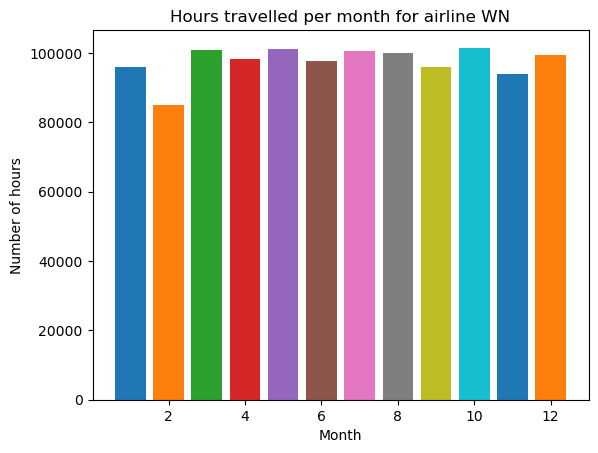

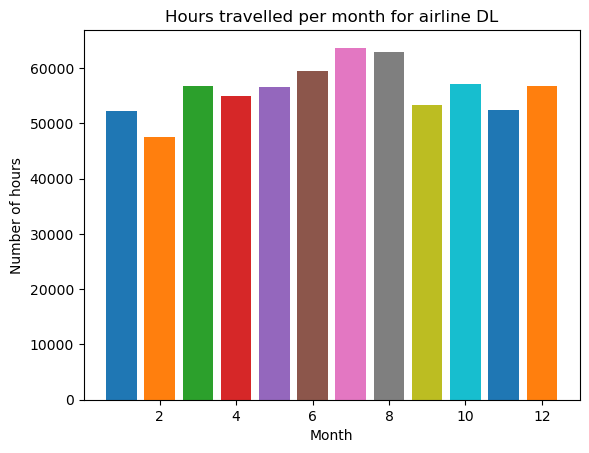

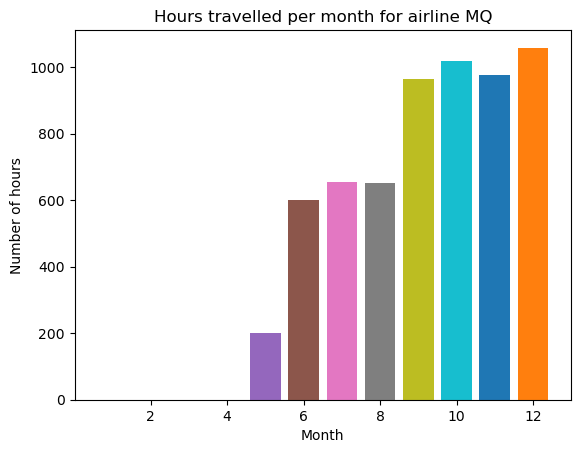

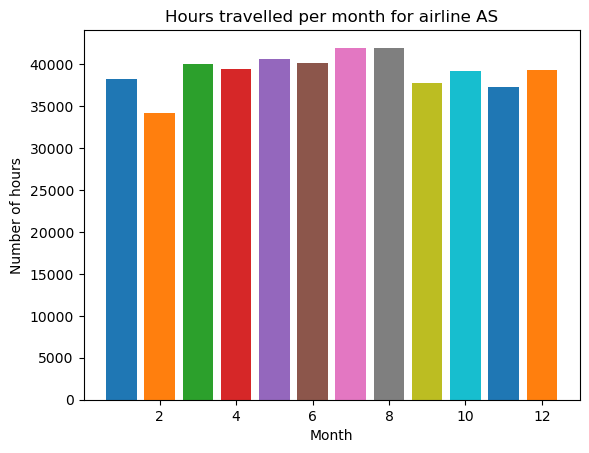

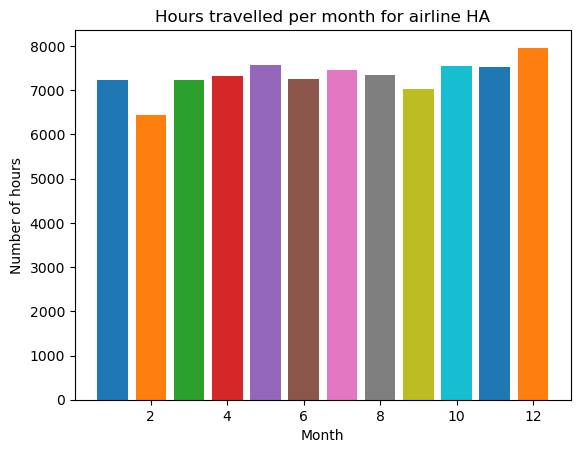

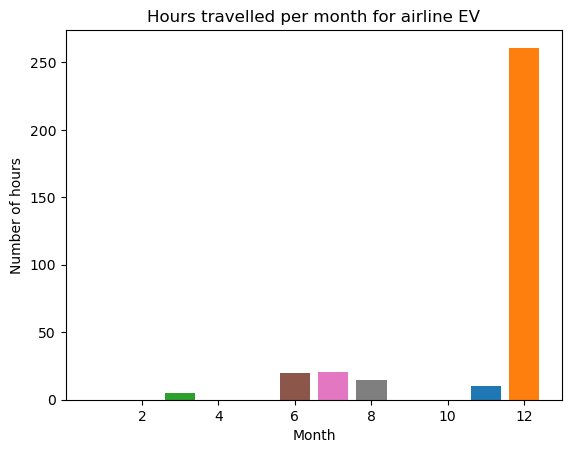

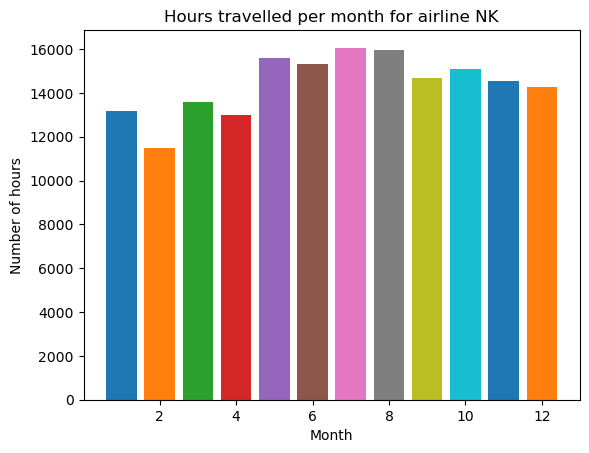

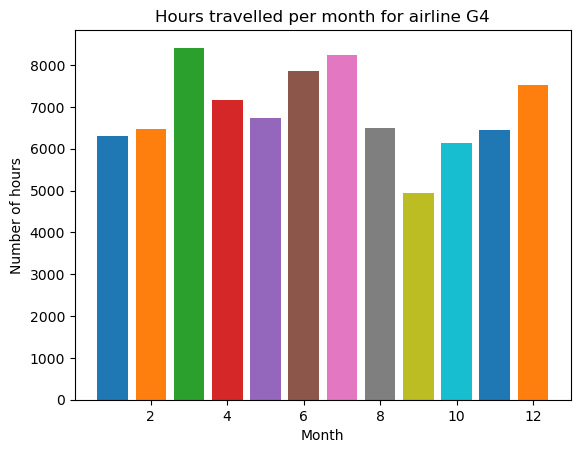

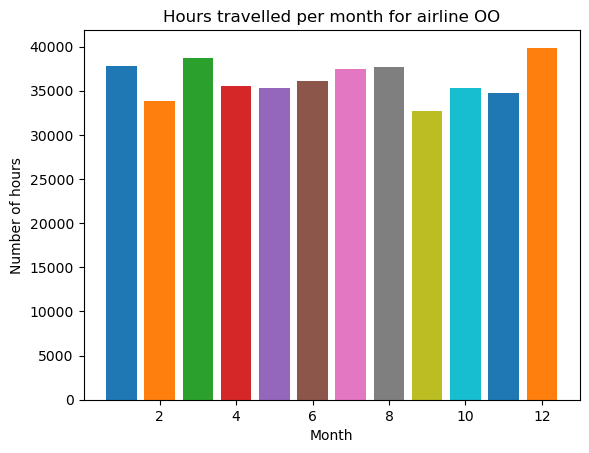

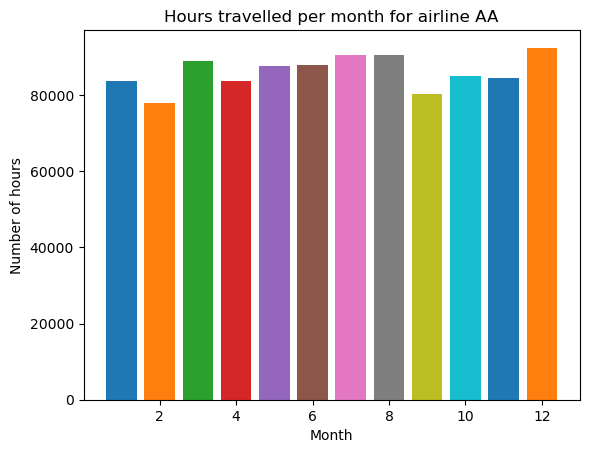

In [20]:
# going through all the top ten carriers
for carrier in carrier_names[:10]:
    carrier_df = df[df["CARRIER_CODE"] == carrier]
    count = 1

    # while the count is below 12 to not go over the 12 months, take the sum of all the flight minutes for that month and 
    # divide by 60 to get the number of hours
    while count <= 12:
        month_df = carrier_df[carrier_df["MONTH_DEPARTED"] == count]
        
        month_hours = round((month_df["ELAPSED_TIME"].sum() / 60), 2)
        
        # plot the month with the number of hours
        plt.bar(count, month_hours)
        count+=1
        plt.title(f"Hours travelled per month for airline {carrier}")
        plt.xlabel("Month")
        plt.ylabel("Number of hours")

    # show the plot once all the months have been put in
    plt.show()





Depending on the airline, there is a very big difference in the hours flown each month. Some airlines like EV barely fly more than 20 hours, some months even flying 0. Others, like AA, tend to fly over 80,000 hours a month. The reasoning for this is most likely just the size of the airline itself. If it is a smaller less known company, it is bound to be used less, while if it is a large succsessfull company it'll have a lot of planes that would be used.

In [21]:
# take 3 aircrafts to see where they go
aircraft_lst = df["TAIL_NUM"].unique().tolist()
three_aircrafts = aircraft_lst[:3]
three_aircrafts

['N916NN', 'N733UW', 'N140AN']

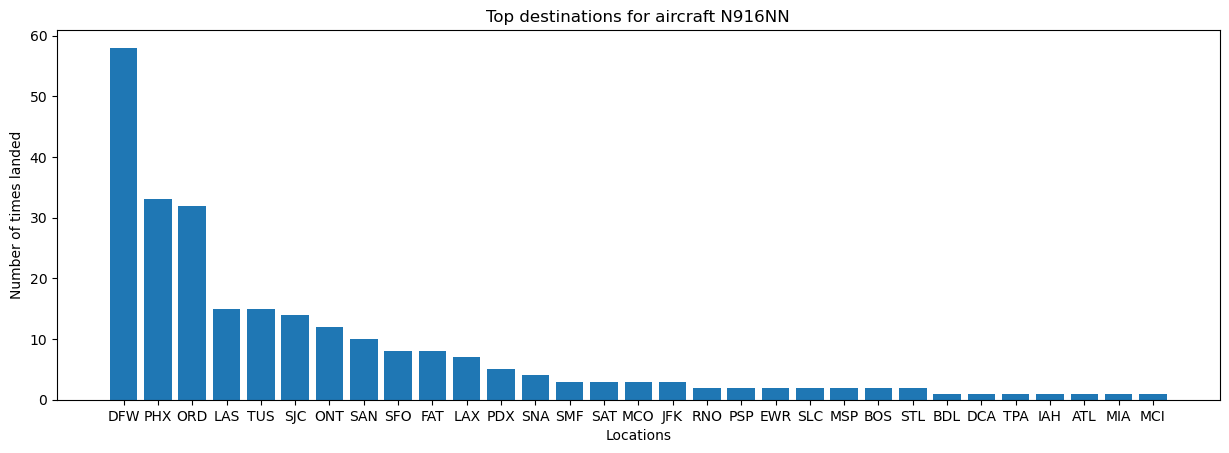

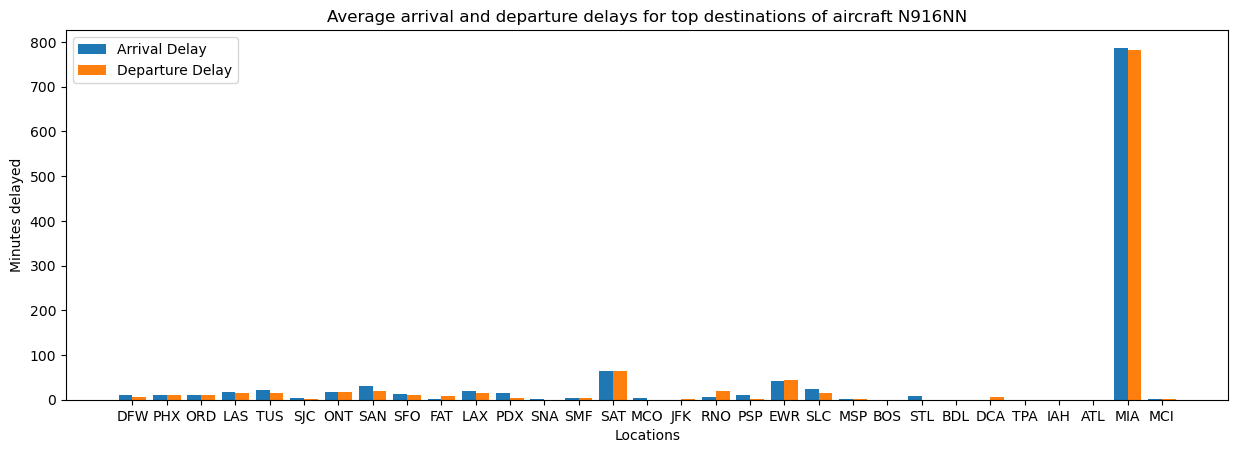

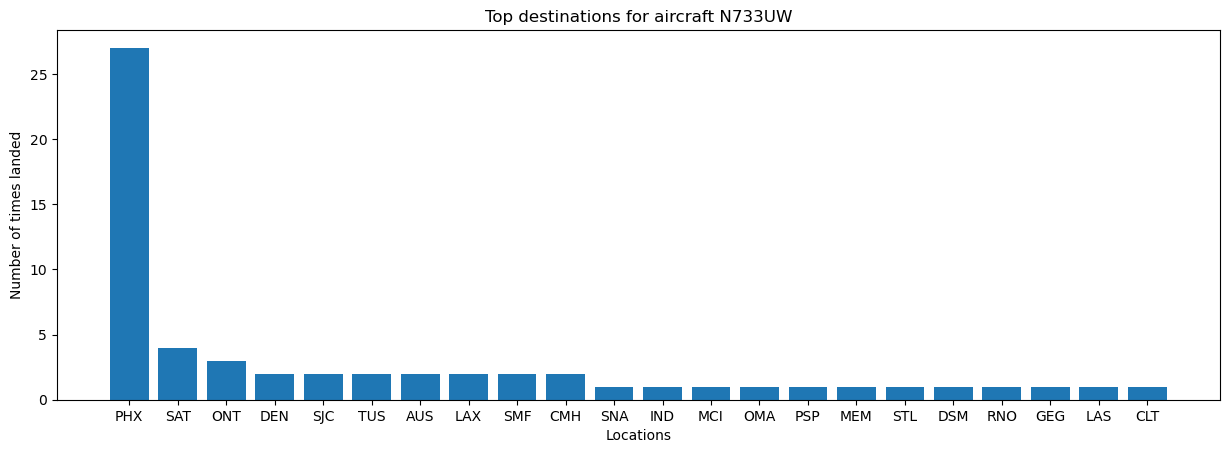

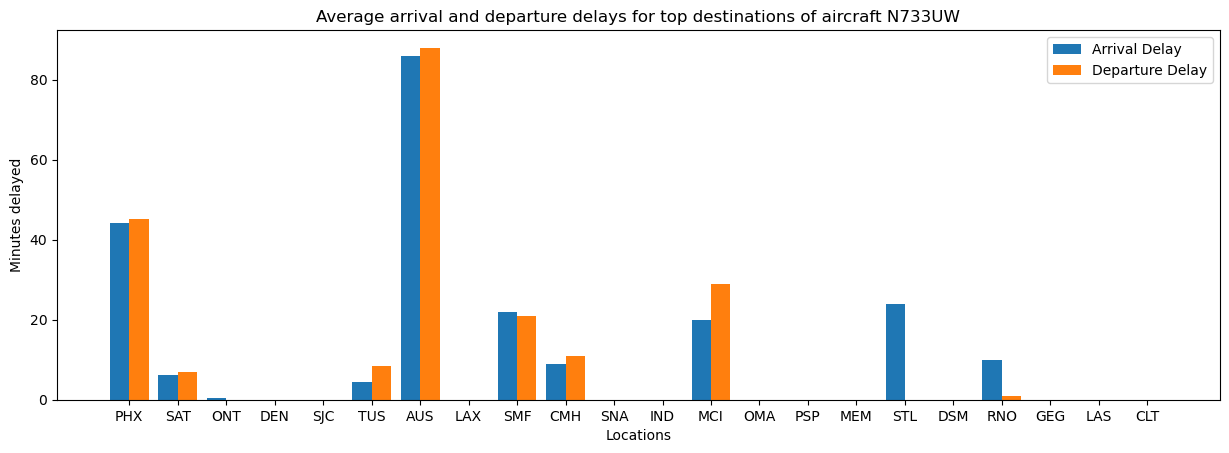

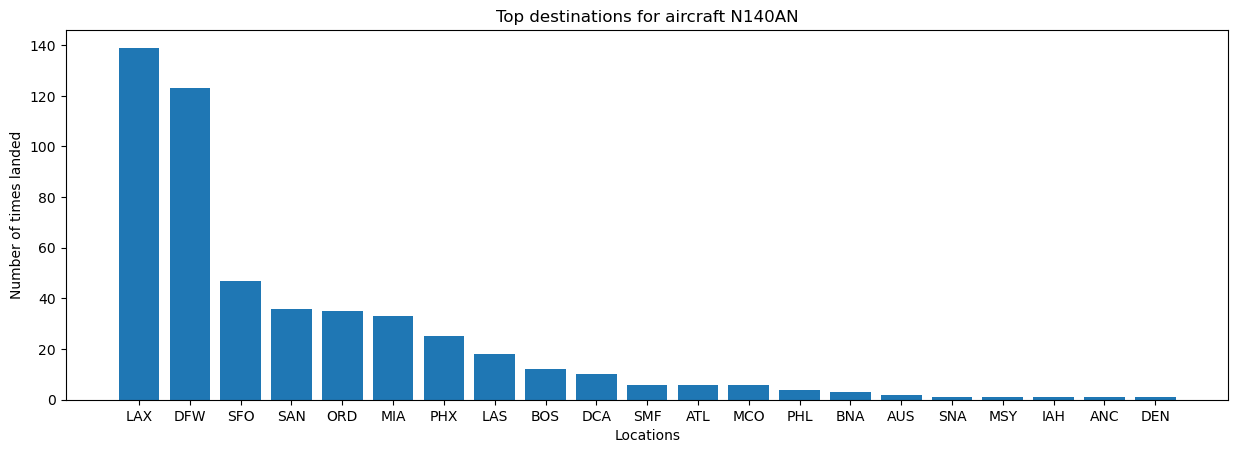

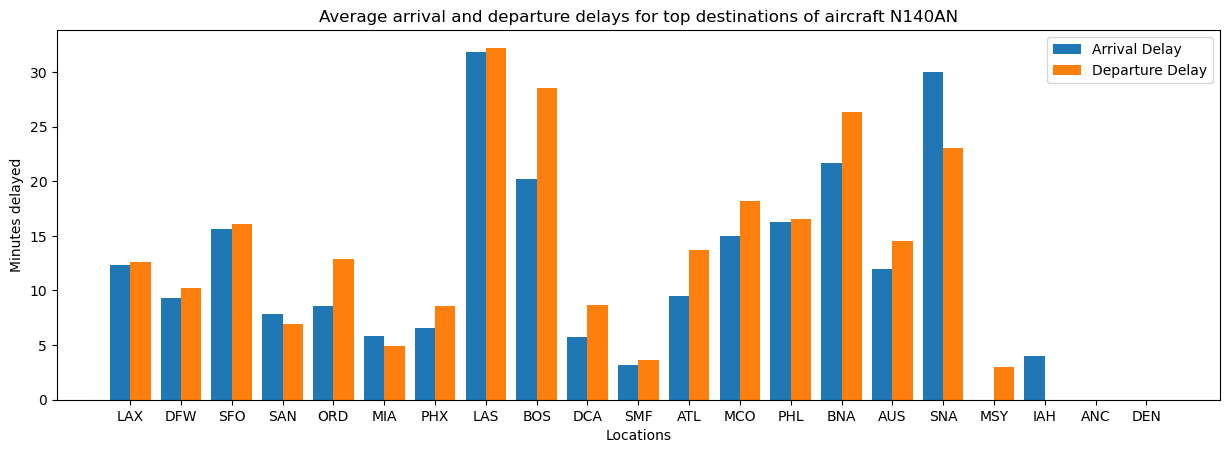

In [22]:
# create plots showing the top destinations for each of the three aircrafts.

# initialize a count for which aircraft we are using in the plots
count = 0

# start the for loop for the aircrafts
for aircraft in three_aircrafts:

    # plot the top destinations for the aircraft
    aircraft_flights = df[df["TAIL_NUM"] == aircraft]
    aircraft_locs = aircraft_flights["DEST"].value_counts().keys().tolist()
    aircraft_nums = aircraft_flights["DEST"].value_counts().tolist()
    plt.figure().set_figwidth(15)
    plt.bar(aircraft_locs, aircraft_nums)
    plt.title(f"Top destinations for aircraft {three_aircrafts[count]}")
    plt.xlabel("Locations")
    plt.ylabel("Number of times landed")
    plt.show()

    # plot the average arrival and departure delays for the aircraft at each airport
    arr_delay = []
    dep_delay = []
    X_axis = np.arange(len(aircraft_locs)) 
    for dest in aircraft_locs:
        aircraft_dest_df = aircraft_flights[aircraft_flights["DEST"] == dest]
        avg_dep_delay = aircraft_dest_df["DEP_DELAY"].describe()["mean"]
        avg_arr_delay = aircraft_dest_df["ARR_DELAY"].describe()["mean"]
        dep_delay.append(avg_dep_delay)
        arr_delay.append(avg_arr_delay)
    plt.figure().set_figwidth(15)
    plt.bar(X_axis - 0.2, arr_delay, 0.4, label = "Arrival Delay")
    plt.bar(X_axis + 0.2, dep_delay, 0.4, label = "Departure Delay")
    plt.xticks(X_axis, aircraft_locs) 
    plt.legend()
    plt.title(f"Average arrival and departure delays for top destinations of aircraft {three_aircrafts[count]}")
    count += 1
    plt.xlabel("Locations")
    plt.ylabel("Minutes delayed")
    plt.show()
    

Through the code, it can be seen that aircraft N916NN mostly travels to DFW, aircraft N140AN mostly travels to LAX, and aircraft N733UW mostly travels to PHX. Aircraft N916NN did not seem to be delayed for very long on most occasions, except for a 1 off flight to MIA which was delayed for over 700 minutes (over 11 hours). Aircraft N733UW tends to be delayed over 40 minutes on average to its most traveled to destination, and is on average over an hour delayed when going to AUS. Aircraft N140AN is almost always 10 minutes delayed on average, but is never over 30 minutes delayed on averageto go anywhere. 

In [23]:
for aircraft in three_aircrafts:

    # plot the top destinations for the aircraft
    aircraft_flights = df[df["TAIL_NUM"] == aircraft]
    airline = aircraft_flights["CARRIER_CODE"].value_counts().keys().tolist()
    print(f"The airline that operates aircraft {aircraft} is  {airline[0]}")

The airline that operates aircraft N916NN is  AA
The airline that operates aircraft N733UW is  AA
The airline that operates aircraft N140AN is  AA
